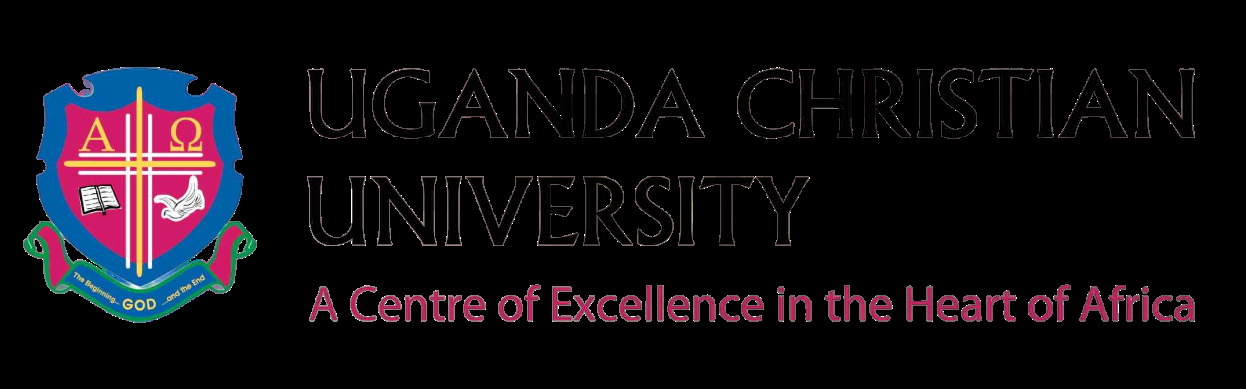
FACULTY OF ENGINEERING, DESIGN AND TECHNOLOGY

DEPARTMENT OF COMPUTING AND TECHNOLOGY

EASTER 2025 SEMESTER EXAMINATION

NAME: CHEMAYEK MARTIN   REG NUMBER: J25M19/026  ACCESS NUMBER: B31377

PROGRAM: MASTER OF SCIENCE IN DATA SCIENCE & ANALYTICS

YEAR: 1 SEMESTER: 1

COURSE CODE: DSC8201

COURSE NAME: DATA SCIENCE LIFECYCLE

EXAMINATION TYPE: PROJECT-BASED EXAM


Theme 4: Education 

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Step 1: Data Collections
* Secondary data from UC Irvine
Machine Learning Repository for student performance in higher education of Portuguese schools. 

In [28]:
# Load the Dataset
df_student = pd.read_csv("Student_performance .csv")

In [29]:
print(df_student.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [31]:
print(df_student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Step 2: Data Preprocessing

In [36]:
# Check for missing values
df_student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [38]:
# Create a binary pass/fail column: assuming a final grade of 10 (out of 20) is passing.
df_student['pass'] = (df_student['G3'] >= 10).astype(int)

In [39]:
# Convert categorical variables to numeric via one-hot encoding.
# Identify columns that are of type 'object'
categorical_cols = df_student.select_dtypes(include=['object']).columns
df_student_encoded = pd.get_dummies(df_student, columns=categorical_cols, drop_first=True)
print("\nShape after encoding:", df_student_encoded.shape)



Shape after encoding: (649, 43)


Step 3: Exploratory Data Analysis (EDA)

a. Analyze historical performance over time and across regions.

C:\Users\User\AppData\Local\Temp\ipykernel_16044\2333821119.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='age', y='G3', data=df_student, ci='sd', palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_16044\2333821119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='G3', data=df_student, ci='sd', palette='viridis')


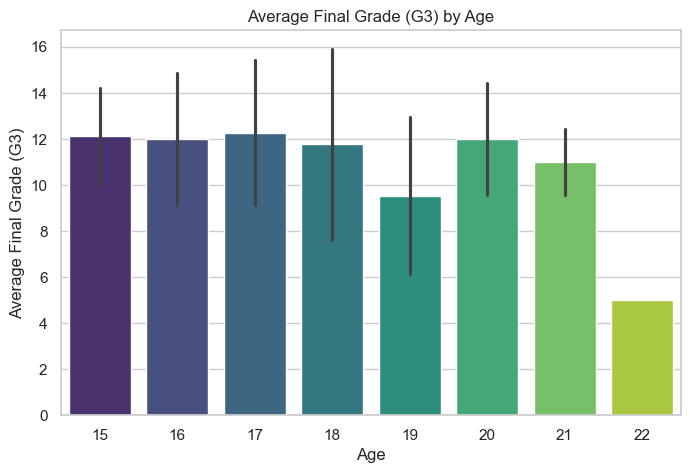

C:\Users\User\AppData\Local\Temp\ipykernel_16044\2333821119.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='address', y='G3', data=df_student, ci='sd', palette='magma')
C:\Users\User\AppData\Local\Temp\ipykernel_16044\2333821119.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='address', y='G3', data=df_student, ci='sd', palette='magma')


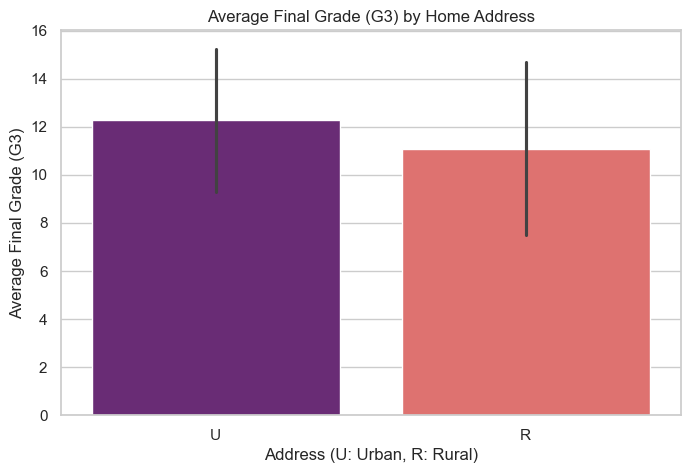

In [40]:
# Since the dataset is cross-sectional, we use 'age' as a proxy for progression,
# and 'address' (Urban/Rural) to compare regional differences.
plt.figure(figsize=(8, 5))
sns.barplot(x='age', y='G3', data=df_student, ci='sd', palette='viridis')
plt.title('Average Final Grade (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Average Final Grade (G3)')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='address', y='G3', data=df_student, ci='sd', palette='magma')
plt.title('Average Final Grade (G3) by Home Address')
plt.xlabel('Address (U: Urban, R: Rural)')
plt.ylabel('Average Final Grade (G3)')
plt.show()

Students from urban areas had better final grades than those from the Rural areas.

b. Highlight high-performing and low-performing students.

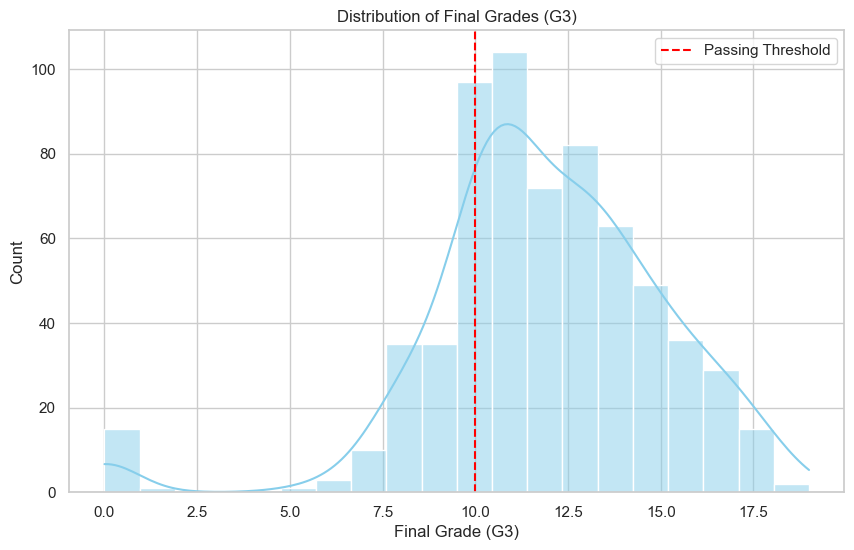

In [41]:
# Histogram with passing threshold marker.
plt.figure(figsize=(10, 6))
sns.histplot(df_student['G3'], bins=20, kde=True, color='skyblue')
plt.axvline(10, color='red', linestyle='--', label='Passing Threshold')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.legend()
plt.show()

The above histogram shows that data is skewed to the left and using pass threshold of 10/20, indicates that more students highly performed than low performing. The highest performing at 17.5/20. Most students had final grades between 10 to 14.

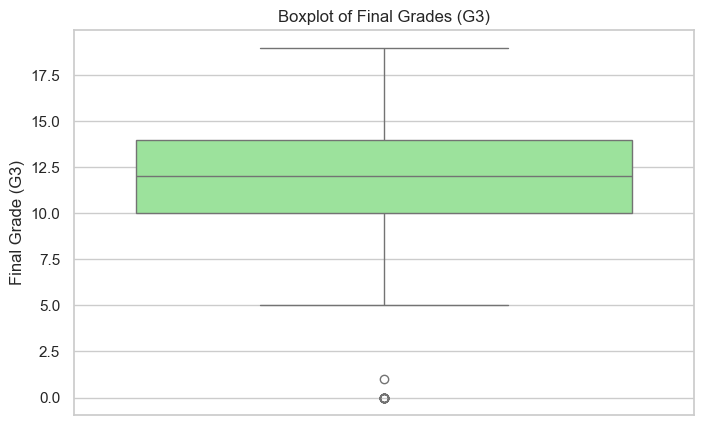

In [42]:
# Boxplot to inspect spread and outliers in the final grades.
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_student, y='G3', color='lightgreen')
plt.title('Boxplot of Final Grades (G3)')
plt.ylabel('Final Grade (G3)')
plt.show()


There are only 2 student who had o and 1 grade at the fianl grade making it an outlier at the final grade. This does not affect the final grade distribution. 

c. Identify variables that affect student performance.

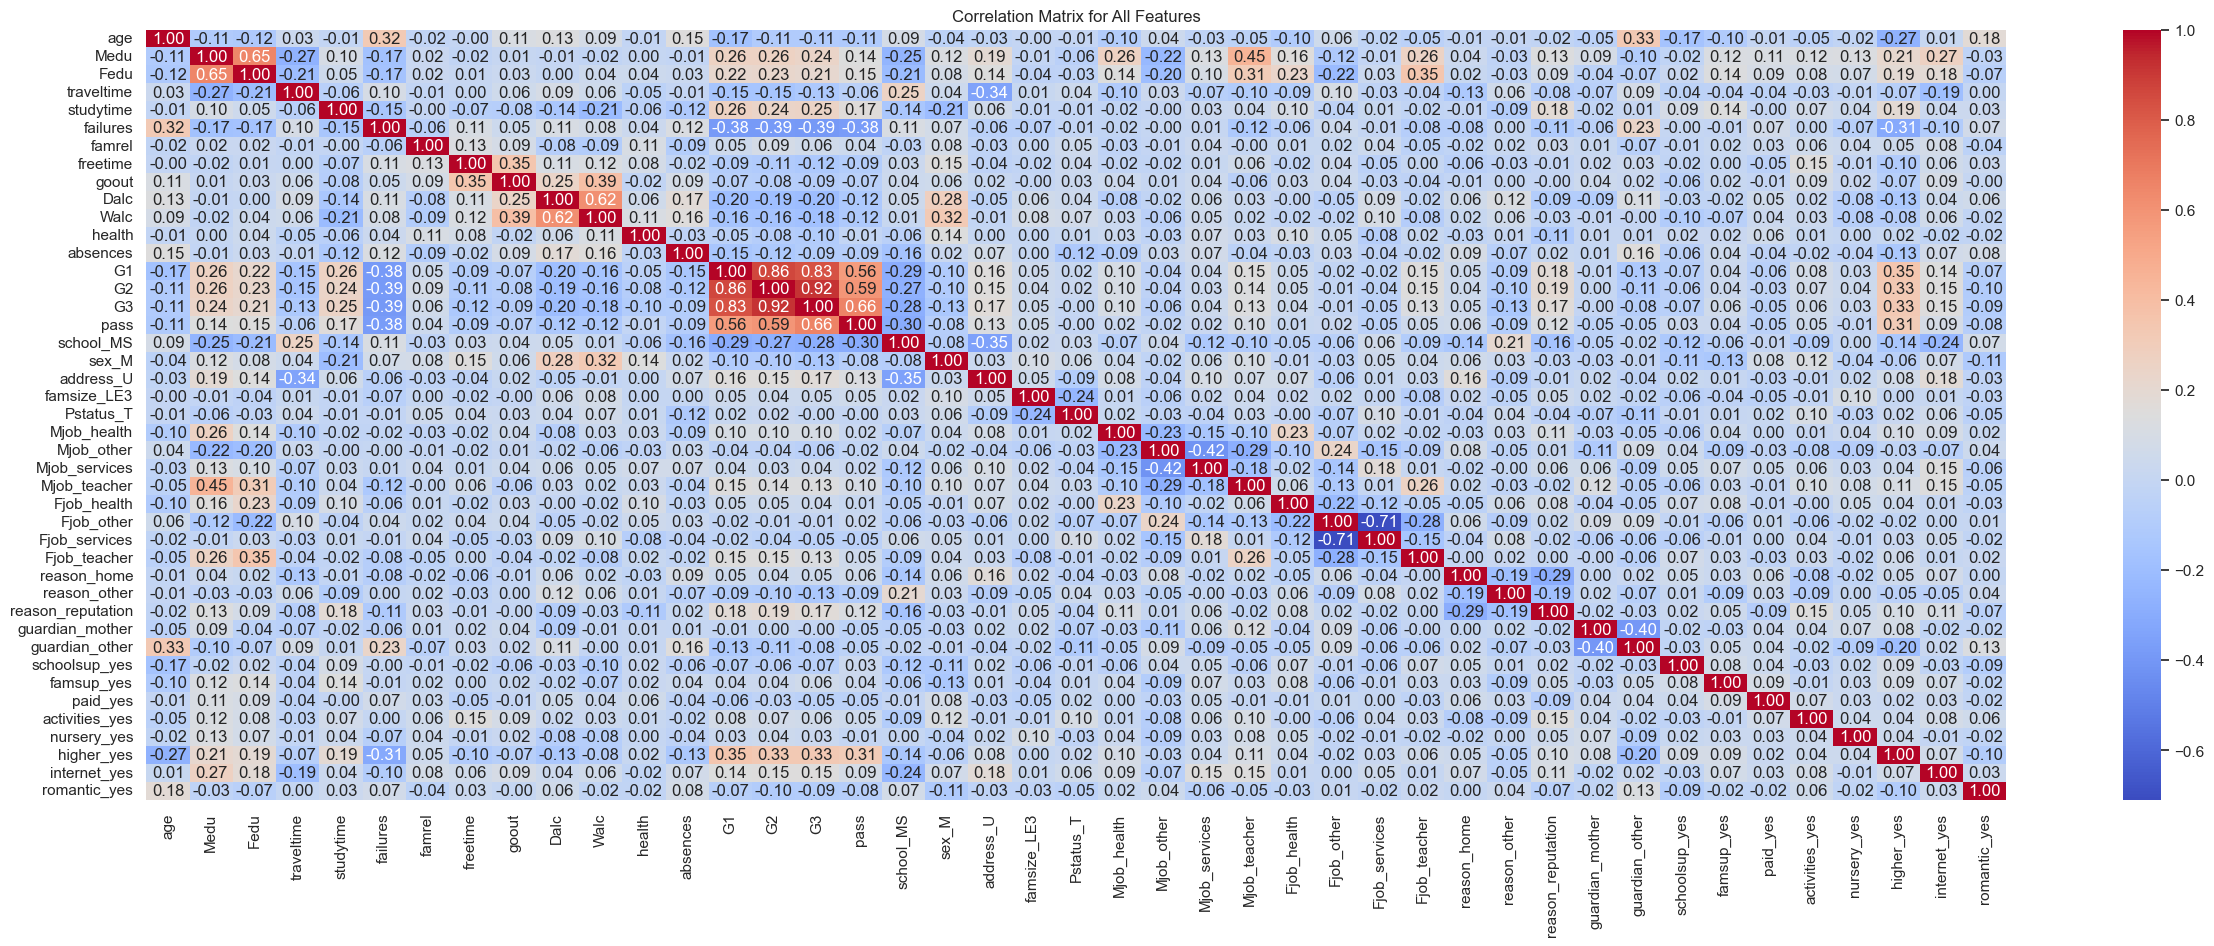

In [48]:
# Use the encoded DataFrame for a correlation matrix.
plt.figure(figsize=(30, 10))
corr_matrix = df_student_encoded.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix for All Features')
plt.show()


In [49]:
# Print feature correlations with the target variable G3
corr_target = corr_matrix['G3'].sort_values(ascending=False)
print("\nTop features correlated with Final Grade (G3):")
print(corr_target.head(10))


Top features correlated with Final Grade (G3):
G3                   1.000000
G2                   0.918548
G1                   0.826387
pass                 0.663157
higher_yes           0.332172
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
reason_reputation    0.170944
address_U            0.167637
Name: G3, dtype: float64


Step 4: Build, Evaluate, and Optimize Predictive Models

In [50]:
# Our target will be the final grade ('G3').
# We drop the earlier grade columns G1 and G2, as well as the 'pass' indicator, 
# so that our model is not biased by the scores from earlier periods.
features = df_student_encoded.drop(columns=['G3', 'G1', 'G2', 'pass'])
target = df_student_encoded['G3']

In [52]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

a. Generate three machine learning models:

In [53]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

# Model 3: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Model evaluation output
print("\nModel Evaluation:")
print(f"Linear Regression -> MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")
print(f"Decision Tree     -> MSE: {dt_mse:.2f}, R²: {dt_r2:.2f}")
print(f"Random Forest     -> MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")



Model Evaluation:
Linear Regression -> MSE: 8.19, R²: 0.16
Decision Tree     -> MSE: 13.50, R²: -0.38
Random Forest     -> MSE: 8.04, R²: 0.18


b. Choose the best model based on evaluation (highest R² and lowest MSE preferred)

In [54]:
if (rf_r2 >= lr_r2) and (rf_r2 >= dt_r2):
    recommended_model = rf_model
    model_name = "Random Forest Regressor"
elif (lr_r2 >= dt_r2) and (lr_r2 >= rf_r2):
    recommended_model = lr_model
    model_name = "Linear Regression"
else:
    recommended_model = dt_model
    model_name = "Decision Tree Regressor"

print(f"\nRecommended Model: {model_name}")



Recommended Model: Random Forest Regressor


 c. Validate the recommended model.

In [55]:
# In a real-world scenario, you would have an external validation set.
# Here, we simulate validation by splitting the test set further.
X_train_val, X_val, y_train_val, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
val_preds = recommended_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_preds)
val_r2 = r2_score(y_val, val_preds)
print(f"\nValidation Metrics for {model_name}:")
print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation R²: {val_r2:.2f}")



Validation Metrics for Random Forest Regressor:
Validation MSE: 8.17
Validation R²: 0.22
